In [3]:
import seaborn as sns
import pandas as pd
import scipy.stats as st
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statistics import mean
import ast

warnings.filterwarnings('ignore')

# Experiment 1: Measure Quality
Compare achieved standard deviation for the following settings
- Naive Repair: execute old plan, and skip steps that are not possible any more
- Replanning: 
- Replanning with Seed: 

In [4]:
def exp1_prepare_results(folder_path, visualize = False):
    files = os.listdir(os.path.join('.', folder_path))
    mean = pd.DataFrame(columns = ["Option", "Initial Plan", "STD after Disturbance", "Naive Repair", "Replanning", "Replanning (seed 0.2)"])
    std = pd.DataFrame(columns = ["Option", "Naive Repair", "Replanning", "Replanning (seed 0.2)"])
    for f in files:
        if f.endswith("csv"):
            df = pd.read_csv(os.path.join('.', folder_path, f))
            mean_row = {}
            std_row = {}
            for name, group in df.groupby(by='variant'):
                if(name == "NSGAII_PlanningStrategy-ReplanningStrategy_naive_2" or name == "NSGAII_NaivePlanningStrategy_2" or name =="NSGAII_PlanningStrategy-ReplanningStrategy_naive_0"):
                    mean_row["Naive Repair"] = round(group['final_objective_value'].median(), 3)
                    mean_row["Initial Plan"] = round(group['initial_planning_objective'].median(), 3)
                    mean_row["STD after Disturbance"] = round(group['initial_post_disturbance_std'].median(), 3)
                    std_row["Naive Repair"] = round(group['final_objective_value'].std(), 3)
                    if visualize:
                        plt.plot(group["run"], group["final_objective_value"], label = "Naive repair")
                elif(name == "NSGAII_PlanningStrategy-ReplanningStrategy_0" or name == "NSGAII_EvaluationReplanningStrategy-10000_1" or name == "NSGAII_EvaluationReplanningStrategy-10000_0" or name == "NSGAII_PlanningStrategy-ReplanningStrategy_1"):
                    mean_row["Replanning"] = round(group['final_objective_value'].median(), 3)
                    std_row["Replanning"] = round(group['final_objective_value'].std(), 3)
                    if visualize:
                        plt.plot(group["run"], group["final_objective_value"], label = "Replan")
                elif(name == "NSGAII_PlanningStrategy-ReplanningStrategy_reuse0,10_1" or name == "NSGAII_EvaluationReplanningStrategy-10000reusePortion=0.2_withReinit_0" or name == "NSGAII_EvaluationReplanningStrategy-10000reusePortion=0.2_withSeed_1" or name =="NSGAII_PlanningStrategy-ReplanningStrategy_reuse0.10_2"):
                    mean_row["Replanning (seed 0.2)"] = round(group['final_objective_value'].median(), 3)
                    std_row["Replanning (seed 0.2)"] = round(group['final_objective_value'].std(), 3)
                    if visualize:
                        plt.plot(group["run"], group["final_objective_value"], label = "Replan with Seed")

            mean_row["Option"] = f.split("@")[1].split("_errPerDisturbance-5")[0]
            mean = mean.append(mean_row, ignore_index = True)
            std_row["Option"] = f.split("@")[1].split("_errPerDisturbance-5")[0]
            std = std.append(std_row, ignore_index = True)
            if visualize:
                plt.title(f.split("@")[1].split("_errPerDisturbance-5")[0])
                plt.legend()
                plt.show()
    return (mean, std)
    
def exp1_relative_values(absolute_values):
    mean_relative = pd.DataFrame(columns = ["Option", "Diff STD after disturbance to initial plan", "Diff Naive Repair to Initial", 
                                           "Diff Replanning to Naive Repair", "Diff seed 0.2 to no seed"])
    mean_relative["Diff STD after disturbance to initial plan"] = (absolute_values["STD after Disturbance"] - absolute_values["Initial Plan"]) / absolute_values["Initial Plan"] * 100
    mean_relative["Diff Naive Repair to Initial"] = (absolute_values["Naive Repair"] - absolute_values["Initial Plan"]) / absolute_values["Initial Plan"] * 100
    mean_relative["Diff Replanning to Naive Repair"] = (absolute_values["Replanning"] - absolute_values["Naive Repair"])/ absolute_values["Naive Repair"] * 100
    mean_relative["Diff seed 0.2 to no seed"] = (absolute_values["Replanning (seed 0.2)"] - absolute_values["Replanning"])/ absolute_values["Replanning"] * 100
    mean_relative["Option"] = absolute_values["Option"]
    mean_relative.round(3)
    return mean_relative

def exp1_merge_absolute_relative(absolute, relative):
    result = pd.DataFrame(columns = ["Option", "Initial Plan", "Naive Repair", "Naive Repair / Initial Plan",
                                     "Replan", "Replan / Naive Repair", "Seed", "Seed / No Seed"])
    result["Option"] = absolute["Option"]
    result["Initial Plan"] = absolute["Initial Plan"]
    result["Naive Repair"] = absolute["Naive Repair"]
    result["Replan"] = absolute["Replanning"]
    result["Seed"] = absolute["Replanning (seed 0.2)"]
    result["Naive Repair / Initial Plan"] = relative["Diff Naive Repair to Initial"]
    result["Replan / Naive Repair"] = relative["Diff Replanning to Naive Repair"]
    result["Seed / No Seed"] = relative["Diff seed 0.2 to no seed"]
    return result

## statistics for fixed plan length (solutionLength = 200)

In [5]:
exp1_mean_simpleModel, exp1_std_simpleModel = exp1_prepare_results("exp1/fixedPlanLength/max10itemsperstack")
exp1_mean_simpleModel_rel = exp1_relative_values(exp1_mean_simpleModel)
exp1_result_simpleModel = exp1_merge_absolute_relative(exp1_mean_simpleModel, exp1_mean_simpleModel_rel)
exp1_mean_complexModel, exp1_std_complexModel = exp1_prepare_results("exp1/fixedPlanLength/max100itemsperstack")
exp1_mean_complexModel_rel = exp1_relative_values(exp1_mean_complexModel)
exp1_result_complexModel = exp1_merge_absolute_relative(exp1_mean_complexModel, exp1_mean_complexModel_rel)
print("Simple Model")
display(exp1_result_simpleModel)
exp1_result_simpleModel.to_csv("exp1_table_simpleModel.csv", sep=";", float_format=",")
print("Complex Model")
display(exp1_result_complexModel)
exp1_result_complexModel.to_csv("exp1_table_complexModel.csv", sep=";", float_format=",")
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

Simple Model


,Option,Initial Plan,Naive Repair,Naive Repair / Initial Plan,Replan,Replan / Naive Repair,Seed,Seed / No Seed
0,ADD_STACKS_FIRST_10_PERCENT,1.673,2.33,39.270771,1.735,-25.536481,1.709,-1.498559
1,ADD_STACKS_LAST_10_PERCENT,1.625,2.13,31.076923,1.437,-32.535211,1.98,37.787056
2,ADD_STACKS_MIDDLE_10_PERCENT,1.643,2.218,34.996957,1.582,-28.674482,1.797,13.590392
3,REMOVE_STACKS_FIRST_10_PERCENT,1.612,1.899,17.80397,1.486,-21.748289,1.554,4.576043
4,REMOVE_STACKS_LAST_10_PERCENT,1.575,1.59,0.952381,1.278,-19.622642,1.577,23.395931
5,REMOVE_STACKS_MIDDLE_10_PERCENT,1.667,1.824,9.418116,1.476,-19.078947,1.591,7.791328


Complex Model


,Option,Initial Plan,Naive Repair,Naive Repair / Initial Plan,Replan,Replan / Naive Repair,Seed,Seed / No Seed
0,ADD_STACKS_FIRST_10_PERCENT,15.627,22.112,41.498688,15.291,-30.847504,15.701,2.681316
1,ADD_STACKS_LAST_10_PERCENT,14.904,20.28,36.070853,13.558,-33.145957,18.942,39.710872
2,ADD_STACKS_MIDDLE_10_PERCENT,15.07,21.136,40.252157,14.214,-32.749811,16.161,13.697763
3,REMOVE_STACKS_FIRST_10_PERCENT,15.034,17.374,15.56472,14.263,-17.906067,13.791,-3.309262
4,REMOVE_STACKS_LAST_10_PERCENT,14.854,15.025,1.151205,11.829,-21.271215,13.901,17.516274
5,REMOVE_STACKS_MIDDLE_10_PERCENT,15.079,16.736,10.988792,13.045,-22.054254,13.184,1.065542


## Charts

In [38]:
def plot(xs, means, q1, q3, names, xlab, ylab, savepath=None, legloc="lower right"):
    
    plt.figure(figsize=(10,6))
    
    ax1 = sns.lineplot(xs[0], means[0], linewidth=2, color="#F9766D", label=names[0])
    ax1.fill_between(xs[0], q1[0], q3[0], alpha=0.35, color="#F9766D") 
    ax2 = sns.lineplot(xs[1], means[1], linewidth=2, color=col[6], label=names[1])
    ax2.fill_between(xs[1], q1[1], q3[1], alpha=0.35, color=col[6]) 
    plt.plot(18)

    plt.yticks(fontsize="16")
    plt.xticks(fontsize="16")

    plt.ylabel(ylab, fontsize="18")
    plt.xlabel(xlab, fontsize="18")
    plt.legend()
    plt.legend(loc=legloc, fontsize="16")
    
    sns.despine(left=True, bottom=True)

    if savepath is not None:
        plt.savefig(f'{savepath}.pdf', dpi=300)

def get_stats_by_group(df, value_attr, groupby_attr, bounding_stats="ci", ci_level=.95):
    stats = df.groupby(groupby_attr).describe()
    x = stats.index
    mean = stats[(value_attr, 'mean')]
    mean.name = value_attr

    lower_bounds = []
    upper_bounds = []
    if bounding_stats == "ci":
        cis = []
        for _,data in df.groupby(groupby_attr):
            cis.append(st.t.interval(alpha=ci_level, df=len(data)-1, loc=np.mean(data[value_attr]), scale=st.sem(data[value_attr])))
        lower_bounds = [i[0] for i in cis]
        upper_bounds = [i[1] for i in cis]
    elif bounding_stats == "std":
        lower_bounds = mean - stats[(value_attr, 'std')]
        upper_bounds = mean + stats[(value_attr, 'std')]
    return x, mean, (lower_bounds, upper_bounds)

In [2]:

files = os.listdir(os.path.join('.', "exp1/periteration"))
mean = pd.DataFrame(columns = ["Option", "Iteration", "Treatment", "Value"])
for f in files:
    if f.endswith("csv"):
        df = pd.read_csv(os.path.join('.', "exp1/periteration", f))
        
        for name, group in df.groupby(by=['variant', 'evaluations']):
            mean_row = {"Option": f, "Iteration": name[1]/100, "Value": round(group['objective_value'].mean(), 3)}
            
            if(name[0] == "NSGAII_PlanningStrategy-ReplanningStrategy_0" or name[0] == "NSGAII_EvaluationReplanningStrategy-10000_1" or name[0] == "NSGAII_EvaluationReplanningStrategy-10000_0" or name[0] == "NSGAII_PlanningStrategy-ReplanningStrategy_1"):
                mean_row["Treatment"] = "Replan"
            elif(name[0] == "NSGAII_PlanningStrategy-ReplanningStrategy_reuse0,10_1" or name[0] == "NSGAII_EvaluationReplanningStrategy-10000reusePortion=0.2_withReinit_0" or name[0] == "NSGAII_EvaluationReplanningStrategy-10000reusePortion=0.2_withSeed_1" or name[0] =="NSGAII_PlanningStrategy-ReplanningStrategy_reuse0.10_2"):
                 mean_row["Treatment"] = "Replan with Seed"
            mean = mean.append(mean_row, ignore_index=True)
        
display(mean)     
                

,Option,Iteration,Treatment,Value
0,1to100_recordings_addstack_DISTURBER@ADD_STACK...,0.0,Replan,29.968
1,1to100_recordings_addstack_DISTURBER@ADD_STACK...,1.0,Replan,30.058
2,1to100_recordings_addstack_DISTURBER@ADD_STACK...,2.0,Replan,28.135
3,1to100_recordings_addstack_DISTURBER@ADD_STACK...,3.0,Replan,27.15
4,1to100_recordings_addstack_DISTURBER@ADD_STACK...,4.0,Replan,26.728
...,...,...,...,...
601,1to100_recordings_addstack_DISTURBER@ADD_STACK...,96.0,Replan with Seed,16.392
602,1to100_recordings_addstack_DISTURBER@ADD_STACK...,97.0,Replan with Seed,16.386
603,1to100_recordings_addstack_DISTURBER@ADD_STACK...,98.0,Replan with Seed,16.372
604,1to100_recordings_addstack_DISTURBER@ADD_STACK...,99.0,Replan with Seed,16.351


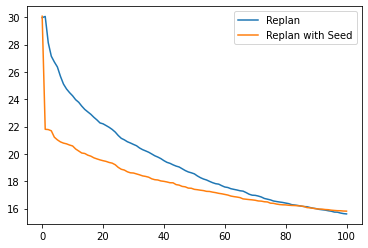

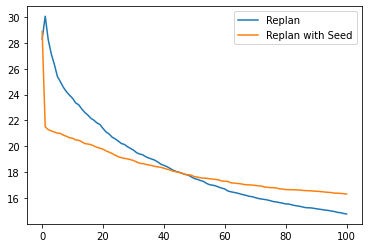

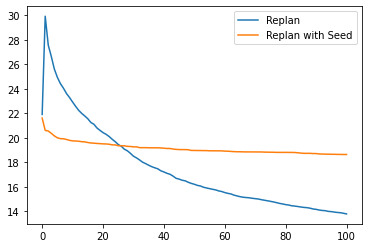

In [6]:
def plot(data):
    replan = data[data.Treatment == "Replan"]
    seed = data[data.Treatment == "Replan with Seed"]
    plt.plot(replan["Iteration"], replan["Value"], label="Replan")
    plt.plot(seed["Iteration"], seed["Value"], label="Replan with Seed")
    plt.legend() 

plot(mean[mean.Option == "1to100_recordings_addstack_DISTURBER@ADD_STACKS_FIRST_10_PERCENT_errPerDisturbance-5_bestObj.csv"])
plt.savefig("exp1_periteration_add_first.png")
plt.show()
plot(mean[mean.Option == "1to100_recordings_addstack_DISTURBER@ADD_STACKS_MIDDLE_10_PERCENT_errPerDisturbance-5_bestObj.csv"])
plt.savefig("exp1_periteration_add_middle.png")
plt.show()
plot(mean[mean.Option == "1to100_recordings_addstack_DISTURBER@ADD_STACKS_LAST_10_PERCENT_errPerDisturbance-5_bestObj.csv"])
plt.savefig("exp1_periteration_add_last.png")
plt.show()
#plt.savefig("exp1_seed_vs_no_seed.png")

#x1, mean1, bounds1 = get_stats_by_group(df1,"averageReward", "epoch", bounding_stats="ci")
#x2, mean2, bounds2 = get_stats_by_group(df2, "averageReward", "epoch", bounding_stats="ci")
#plot([x1, x2], [mean1, mean2], [bounds1[0], bounds2[0]], [bounds2[0], bounds2[1]], [ "rewards_a", "rewards_b"],
        #"Epoch", "Average Cumulative Reward", legloc="lower right", savepath=None)

## Statistical Testing

In [4]:
def get_data(folder_path):
    files = os.listdir(os.path.join('.', folder_path))
    initial_plan = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    naive_repair = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    replan = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    replan_seed = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    pre_disturbance_ov = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    post_disturbance_ov = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    for f in files:
        if f.endswith("csv"):
            df = pd.read_csv(os.path.join('.', folder_path, f))
            option = f.split("@")[1].split("_errPerDisturbance")[0]
            disturbance = option.split("_")[0]
            setting = option.split("_")[2]
            for name, group in df.groupby(by='variant'):
                if(name == "NSGAII_PlanningStrategy-ReplanningStrategy_naive_2" or name == "NSGAII_NaivePlanningStrategy_2" or name =="NSGAII_PlanningStrategy-ReplanningStrategy_naive_0"):
                    for index, row in group.iterrows():
                        naive_repair = naive_repair.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['final_objective_value']},
                                     ignore_index=True)
                        pre_disturbance_ov = pre_disturbance_ov.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['initial_pre_disturbance_std']},
                                     ignore_index=True)
                        post_disturbance_ov = post_disturbance_ov.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['initial_post_disturbance_std']},
                                     ignore_index=True)
                        initial_plan = initial_plan.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['initial_planning_objective']},
                                     ignore_index=True)
                elif(name == "NSGAII_PlanningStrategy-ReplanningStrategy_0" or name == "NSGAII_EvaluationReplanningStrategy-10000_1" or name == "NSGAII_EvaluationReplanningStrategy-10000_0" or name == "NSGAII_PlanningStrategy-ReplanningStrategy_1"):
                    for index, row in group.iterrows():
                        replan = replan.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['final_objective_value']},
                                     ignore_index=True)
                elif(name == "NSGAII_PlanningStrategy-ReplanningStrategy_reuse0,10_1" or name == "NSGAII_EvaluationReplanningStrategy-10000reusePortion=0.2_withReinit_0" or name == "NSGAII_EvaluationReplanningStrategy-10000reusePortion=0.2_withSeed_1" or name =="NSGAII_PlanningStrategy-ReplanningStrategy_reuse0.10_2"):
                    for index, row in group.iterrows():
                        replan_seed = replan_seed.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['final_objective_value']},
                                     ignore_index=True)
    return (naive_repair, replan, replan_seed, pre_disturbance_ov, post_disturbance_ov, initial_plan)
naive_large, replan_large, seed_large, pre_disturbance_large, post_disturbance_large, initial_large = get_data("exp1/fixedPlanLength/max100itemsperstack")
naive_small, replan_small, seed_small, pre_disturbance_small, post_disturbance_small, initial_small = get_data("exp1/fixedPlanLength/max10itemsperstack")
    

### testing naive repair VS replan

In [46]:
def test(replan, seed):
    p_values = pd.DataFrame(columns = ["Option", "p-value"])
    row = {}
    row['Option'] = "First 10 %"
    x = seed[seed.Setting == "FIRST"]['Value'].tolist()
    y = replan[replan.Setting == "FIRST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="greater")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Middle 10 %"
    x = seed[seed.Setting == "MIDDLE"]['Value'].tolist()
    y = replan[replan.Setting == "MIDDLE"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="greater")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Last 10 %"
    x = seed[seed.Setting == "LAST"]['Value'].tolist()
    y = replan[replan.Setting == "LAST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="greater")[1]
    p_values = p_values.append(row, ignore_index = True)
    return p_values
print("Large Model - Add Stack Case")
replan_large_add = replan_large[replan_large.Disturbance=='ADD']
naive_large_add = naive_large[naive_large.Disturbance=='ADD']
display(test(replan_large_add, naive_large_add))
print("Large Model - Delete Stack Case")
replan_large_add = replan_large[replan_large.Disturbance=='REMOVE']
naive_large_add = naive_large[naive_large.Disturbance=='REMOVE']
display(test(replan_large_add, naive_large_add))
print("Small Model - Add Stack Case")
replan_small_add = replan_small[replan_small.Disturbance=='ADD']
naive_small_add = naive_small[naive_small.Disturbance=='ADD']
display(test(replan_small_add, naive_small_add))
print("Small Model - Delete Stack Case")
replan_small_add = replan_small[replan_small.Disturbance=='REMOVE']
naive_small_add = naive_small[naive_small.Disturbance=='REMOVE']
display(test(replan_small_add, naive_small_add))

Large Model - Add Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.0
2,Last 10 %,0.0


Large Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.0
2,Last 10 %,0.0


Small Model - Add Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.0
2,Last 10 %,0.0


Small Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.0
2,Last 10 %,0.0


### testing replan VS replan with seed

In [5]:
def test(replan, seed):
    p_values = pd.DataFrame(columns = ["Option", "p-value"])
    row = {}
    row['Option'] = "First 10 %"
    x = seed[seed.Setting == "FIRST"]['Value'].tolist()
    y = replan[replan.Setting == "FIRST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="less")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Middle 10 %"
    x = seed[seed.Setting == "MIDDLE"]['Value'].tolist()
    y = replan[replan.Setting == "MIDDLE"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="less")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Last 10 %"
    x = seed[seed.Setting == "LAST"]['Value'].tolist()
    y = replan[replan.Setting == "LAST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="less")[1]
    p_values = p_values.append(row, ignore_index = True)
    return p_values
print("Large Model - Add Stack Case")
replan_large_add = replan_large[replan_large.Disturbance=='ADD']
seed_large_add = seed_large[seed_large.Disturbance=='ADD']
display(test(replan_large_add, seed_large_add))
print("Large Model - Delete Stack Case")
replan_large_add = replan_large[replan_large.Disturbance=='REMOVE']
seed_large_add = seed_large[seed_large.Disturbance=='REMOVE']
display(test(replan_large_add, seed_large_add))
print("Small Model - Add Stack Case")
replan_small_add = replan_small[replan_small.Disturbance=='ADD']
seed_small_add = seed_small[seed_small.Disturbance=='ADD']
display(test(replan_small_add, seed_small_add))
print("Small Model - Delete Stack Case")
replan_small_add = replan_small[replan_small.Disturbance=='REMOVE']
seed_small_add = seed_small[seed_small.Disturbance=='REMOVE']
display(test(replan_small_add, seed_small_add))

Large Model - Add Stack Case


,Option,p-value
0,First 10 %,0.990444
1,Middle 10 %,0.999921
2,Last 10 %,1.0


Large Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.092883
1,Middle 10 %,0.781179
2,Last 10 %,0.999986


Small Model - Add Stack Case


,Option,p-value
0,First 10 %,0.973191
1,Middle 10 %,1.0
2,Last 10 %,1.0


Small Model - Delete Stack Case


ValueError: `x` and `y` must be of nonzero size.

### testing std before and after disturbance

In [47]:
def test(replan, seed):
    p_values = pd.DataFrame(columns = ["Option", "p-value"])
    row = {}
    row['Option'] = "First 10 %"
    x = seed[seed.Setting == "FIRST"]['Value'].tolist()
    y = replan[replan.Setting == "FIRST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="two-sided")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Middle 10 %"
    x = seed[seed.Setting == "MIDDLE"]['Value'].tolist()
    y = replan[replan.Setting == "MIDDLE"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="two-sided")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Last 10 %"
    x = seed[seed.Setting == "LAST"]['Value'].tolist()
    y = replan[replan.Setting == "LAST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="two-sided")[1]
    p_values = p_values.append(row, ignore_index = True)
    return p_values
print("Large Model - Add Stack Case")
pre_disturbance_large_add = pre_disturbance_large[pre_disturbance_large.Disturbance=='ADD']
post_disturbance_large_add = post_disturbance_large[post_disturbance_large.Disturbance=='ADD']
display(test(pre_disturbance_large_add, post_disturbance_large_add))
print("Large Model - Delete Stack Case")
pre_disturbance_large_add = pre_disturbance_large[pre_disturbance_large.Disturbance=='REMOVE']
post_disturbance_large_add = post_disturbance_large[post_disturbance_large.Disturbance=='REMOVE']
display(test(pre_disturbance_large_add, post_disturbance_large_add))
print("Small Model - Add Stack Case")
pre_disturbance_small_add = pre_disturbance_small[pre_disturbance_small.Disturbance=='ADD']
post_disturbance_small_add = post_disturbance_small[post_disturbance_small.Disturbance=='ADD']
display(test(pre_disturbance_small_add, seed_small_add))
print("Small Model - Delete Stack Case")
pre_disturbance_small_add = pre_disturbance_small[pre_disturbance_small.Disturbance=='REMOVE']
post_disturbance_small_add = post_disturbance_small[post_disturbance_small.Disturbance=='REMOVE']
display(test(pre_disturbance_small_add, post_disturbance_small_add))

Large Model - Add Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.000168
2,Last 10 %,0.0


Large Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.56922
1,Middle 10 %,0.923442
2,Last 10 %,0.876635


Small Model - Add Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.0
2,Last 10 %,0.0


Small Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.325426
1,Middle 10 %,0.609998
2,Last 10 %,0.923432


## testing initial plan vs naive repair

In [10]:
def test(replan, seed):
    p_values = pd.DataFrame(columns = ["Option", "p-value"])
    row = {}
    row['Option'] = "First 10 %"
    x = seed[seed.Setting == "FIRST"]['Value'].tolist()
    y = replan[replan.Setting == "FIRST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="two-sided")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Middle 10 %"
    x = seed[seed.Setting == "MIDDLE"]['Value'].tolist()
    y = replan[replan.Setting == "MIDDLE"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="two-sided")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Last 10 %"
    x = seed[seed.Setting == "LAST"]['Value'].tolist()
    y = replan[replan.Setting == "LAST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="two-sided")[1]
    p_values = p_values.append(row, ignore_index = True)
    return p_values
print("Large Model - Add Stack Case")
initial_large_add = initial_large[initial_large.Disturbance=='ADD']
naive_large_add = naive_large[naive_large.Disturbance=='ADD']
display(test(initial_large_add, naive_large_add))
print("Large Model - Delete Stack Case")
initial_large_delete = initial_large[initial_large.Disturbance=='REMOVE']
naive_large_delete = naive_large[naive_large.Disturbance=='REMOVE']
display(test(initial_large_delete, naive_large_delete))

Large Model - Add Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.0
2,Last 10 %,0.0


Large Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.0
1,Middle 10 %,0.000021
2,Last 10 %,0.455297


# Experiment 2: Measurement of Evaluations/Time
### Predefined standard deviation ( >= 50% decrease from initial std); Search until quality is sufficient (for initial plan & when replanning after disturbance)


In [5]:
def exp2_prepare_results(folder_path, visualize=False):
    files = os.listdir(os.path.join('.', folder_path))
    mean = pd.DataFrame(columns = ["Option", "Replanning", "Replanning (seed 0.2)", "Diff to no seed"])
    std = pd.DataFrame(columns = ["Option", "Replanning", "Replanning (seed 0.2)"])
    for f in files:
        if f.endswith("csv"):
            df = pd.read_csv(os.path.join('.', folder_path,f), sep=",")
            mean_row = {}
            std_row = {}
            for name, group in df.groupby(by='variant'):
                if(name == "NSGAII_PlanningStrategy-ReplanningStrategy_0"):
                    mean_row["Replanning"] = round(group['last_replanning_time'].median(), 3)
                    std_row["Replanning"] = round(group['last_replanning_time'].std(), 3)
                    if visualize:
                        plt.plot(group["run"], group["last_replanning_time"], label = "Replanning")
                elif(name == "NSGAII_PlanningStrategy-ReplanningStrategy_reuse0.10_1"):
                    mean_row["Replanning (seed 0.2)"] = round(group['last_replanning_time'].median(), 3)
                    std_row["Replanning (seed 0.2)"] = round(group['last_replanning_time'].std(), 3)
                    if visualize:
                        plt.plot(group["run"],group["last_replanning_time"],  label = "Replanning with Seed")
            #print(f)"NSGAII_PlanningStrategy-ReplanningStrategy_reuse0.10_1" und "NSGAII_PlanningStrategy-ReplanningStrategy_0"
           # print(mean_row)
            mean_row["Option"] = f.split("@")[1].split("_errPerDisturbance")[0]
            mean = mean.append(mean_row, ignore_index = True)
            std_row["Option"] = f.split("@")[1].split(".")[0]
            std = std.append(std_row, ignore_index = True)
            if visualize:
                plt.title(f.split("@")[1].split("_errPerDisturbance")[0])
                plt.legend()
                plt.show()
    print("Median - Replanning time")
    mean["Diff to no seed"] = (mean["Replanning (seed 0.2)"] - mean["Replanning"]) / mean["Replanning"] * 100
    return (mean, std)

def visualize(folder_path):
    files = os.listdir(os.path.join('.', folder_path))
    for f in files:
        if f.endswith("csv"):
            df = pd.read_csv(os.path.join('.', folder_path,f), sep=",")
            plt.plot(df["last_replanning_evaluations"])
            plt.title(f.split("@")[1].split("_errPerDisturbance")[0])
            plt.show()

## fixed plan length (solutionLength = 200)

In [6]:
exp2_mean_simpleModel, exp2_std_simpleModel = exp2_prepare_results("exp2/fixedPlanLength/max10itemsperstack")
exp2_mean_complexModel, exp2_std_complexModel = exp2_prepare_results("exp2/fixedPlanLength/max100itemsperstack")
display(exp2_mean_complexModel)

Median - Replanning time
Median - Replanning time


,Option,Replanning,Replanning (seed 0.2),Diff to no seed
0,ADD_STACKS_LAST_10_PERCENT,54.77,298.016,444.122695
1,REMOVE_STACKS_LAST_10_PERCENT,40.989,3.934,-90.402303
2,ADD_STACKS_FIRST_10_PERCENT,84.619,97.161,14.82173
3,ADD_STACKS_MIDDLE_10_PERCENT,64.416,157.806,144.979508
4,REMOVE_STACKS_FIRST_10_PERCENT,55.921,19.651,-64.859355
5,REMOVE_STACKS_MIDDLE_10_PERCENT,50.378,13.662,-72.881019


## statistical testing replan VS replan with seed

In [2]:
def get_data(folder_path):
    files = os.listdir(os.path.join('.', folder_path))
    replan = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    seed = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
    for f in files:
        if f.endswith("csv"):
            df = pd.read_csv(os.path.join('.', folder_path,f), sep=",")
            option = f.split("@")[1].split("_errPerDisturbance")[0]
            disturbance = option.split("_")[0]
            setting = option.split("_")[2]
            for name, group in df.groupby(by='variant'):
                if(name == "NSGAII_PlanningStrategy-ReplanningStrategy_0"):
                    for index, row in group.iterrows():
                        replan = replan.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['last_replanning_evaluations']},
                                         ignore_index=True)
                elif(name == "NSGAII_PlanningStrategy-ReplanningStrategy_reuse0.10_1"):
                    for index, row in group.iterrows():
                        seed = seed.append({'Disturbance': disturbance, 'Setting': setting, 'Value': row['last_replanning_evaluations']},
                                         ignore_index=True)
    return (replan, seed)
                    
replan_large, seed_large = get_data("exp2/fixedPlanLength/max100itemsperstack")
replan_small, seed_small = get_data("exp2/fixedPlanLength/max10itemsperstack")


In [20]:
def test(replan, seed):
    p_values = pd.DataFrame(columns = ["Option", "p-value"])
    row = {}
    row['Option'] = "First 10 %"
    x = seed[seed.Setting == "FIRST"]['Value'].tolist()
    y = replan[replan.Setting == "FIRST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="greater")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Middle 10 %"
    x = seed[seed.Setting == "MIDDLE"]['Value'].tolist()
    y = replan[replan.Setting == "MIDDLE"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="greater")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Last 10 %"
    x = seed[seed.Setting == "LAST"]['Value'].tolist()
    y = replan[replan.Setting == "LAST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="greater")[1]
    p_values = p_values.append(row, ignore_index = True)
    return p_values
print("Large Model - Add Stack Case")
replan_large_add = replan_large[replan_large.Disturbance=='ADD']
seed_large_add = seed_large[seed_large.Disturbance=='ADD']
display(test(replan_large_add, seed_large_add))
print("Large Model - Delete Stack Case")
replan_large_add = replan_large[replan_large.Disturbance=='REMOVE']
seed_large_add = seed_large[seed_large.Disturbance=='REMOVE']
display(test(replan_large_add, seed_large_add))
print("Small Model - Add Stack Case")
replan_small_add = replan_small[replan_small.Disturbance=='ADD']
seed_small_add = seed_small[seed_small.Disturbance=='ADD']
display(test(replan_small_add, seed_small_add))
print("Small Model - Delete Stack Case")
replan_small_add = replan_small[replan_small.Disturbance=='REMOVE']
seed_small_add = seed_small[seed_small.Disturbance=='REMOVE']
display(test(replan_small_add, seed_small_add))

Large Model - Add Stack Case


,Option,p-value
0,First 10 %,0.001553
1,Middle 10 %,0.000002
2,Last 10 %,0.0


Large Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.999722
1,Middle 10 %,0.5
2,Last 10 %,0.999993


Small Model - Add Stack Case


,Option,p-value
0,First 10 %,0.003334
1,Middle 10 %,0.000014
2,Last 10 %,0.0


Small Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.774609
1,Middle 10 %,0.914317
2,Last 10 %,0.999967


# Experiment 3: Parallel Replanning
### Predefined standard deviation ( >= 50% decrease from initial std + initialization approximate); Search until quality is sufficient (initial plan & replan after disturbance while system idle), search in parallel until Q1 = Q2 and T1 < T2

## 1. Case: Evaluatie Time (seconds')

In [54]:
T = 10
plot = False
files = os.listdir(os.path.join('.', 'exp3/case_1to100'))
overall_runtime = pd.DataFrame(columns = ["Option", "Idle Replan", "Parallel (2)", "Parallel (5)", "Parallel (10)"])
overall_runtime_std = pd.DataFrame(columns =  ["Option", "Idle Replan",  "Parallel (2)", "Parallel (5)", "Parallel (10)"])
raw_idle = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
raw_parallel_1 = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
raw_parallel_10 = pd.DataFrame(columns = ['Disturbance', 'Setting', 'Value'])
for f in files:
    if f.endswith("csv"):
        df = pd.read_csv(os.path.join('.', 'exp3/case_1to100', f), sep=";")
        df_p = pd.read_csv(os.path.join('.', 'exp3/case_1to100', "parallel_results", f[:-4] + "_predictive.csv"), sep=";")
        
        ## reenumerate predictive run rows from 0,1,2,3,4,5 to 0,0,0, 1,1,1, ...
        df_p['run'] = df_p['run'].map(int)/3
        df_p['run'] = df_p["run"].map(int)
        
        step_variants = df_p["predicted_steps"].unique()
        
        ## get idle computed objs from predictive run file
        idle_computed_objs = []
        for idx, row in df.iterrows():
            #if not df_p.loc[df_p["run"] == row['run']].empty:
                #idle_computed_objs
                #print(df_p.loc[df_p["run"] == row['run']].iloc[0]["idle_computed_objectives"])
            idle_computed_objs.append(df_p.loc[df_p["run"] == row['run']].iloc[0]["idle_computed_objectives"])
 
        df["idle_computed_objectives"] = idle_computed_objs
        df["idle_computed_steps"] = [ast.literal_eval(g)[1] for g in idle_computed_objs]
        df["idle_computed_steps_execution_time"] = [ast.literal_eval(g)[1]*T for g in idle_computed_objs]
        df["overall_execution_time"] =  df["idle_computed_steps_execution_time"] + df["last_replanning_time"]
       # print(df)
        mean_executiontime_row = {}
        std_executiontime_row = {}

        df_p["pred_plan_steps"] = [ast.literal_eval(g)[1] for g in df_p["pred_plan_objectives"]]
        df_p["pred_plan_steps_execution_time"] = [ast.literal_eval(g)[1]*T for g in df_p["pred_plan_objectives"]]
        df_p["pred_overall_execution_time"] =  df_p["pred_plan_steps_execution_time"] + df_p["pred_plan_runtime"]

        disturbance = f.split("@")[1].split("_errPerDisturbance")[0].split("_")[0]
        setting = f.split("@")[1].split("_errPerDisturbance")[0].split("_")[2]
        for name, g in df.groupby(by='variant'):
            mean_executiontime_row["Idle Replan"] = round(g['overall_execution_time'].median(),3)
            std_executiontime_row["Idle Replan"] = round(g['overall_execution_time'].std(),3)#/mean_executiontime_row["Idle Replan"]*100            
            for index, row in g.iterrows():
                raw_idle = raw_idle.append({"Disturbance": disturbance, "Setting": setting, "Value": row['overall_execution_time']}, ignore_index=True)
            if plot:
                plt.plot(g["run"], g["overall_execution_time"], label = "Idle Replan")
        for name, group in df_p.groupby(by=['variant', 'predicted_steps']):
            mean_executiontime_row[f"Parallel ({name[1]})"] = round(group['pred_overall_execution_time'].median(), 3)
            std_executiontime_row[f"Parallel ({name[1]})"] = round(group['pred_overall_execution_time'].std(), 3)#/mean_executiontime_row[f"Parallel ({name[1]})"]*100
            if name[1]==1:
                for index, row in g.iterrows():
                    raw_parallel_1 = raw_parallel_1.append({"Disturbance": disturbance, "Setting": setting, "Value": row['overall_execution_time']}, ignore_index=True)
            elif name[1]==10:
                for index, row in g.iterrows():
                    raw_parallel_10 = raw_parallel_10.append({"Disturbance": disturbance, "Setting": setting, "Value": row['overall_execution_time']}, ignore_index=True)
            
            if plot:
                plt.plot(group["run"], group["pred_overall_execution_time"], label=f"Parallel ({name[1]})")
      
        mean_executiontime_row["Option"] = f.split("@")[1].split("_errPerDisturbance")[0]
        std_executiontime_row["Option"] = f.split("@")[1].split("_errPerDisturbance")[0]
        print(f.split("@")[1].split("_errPerDisturbance")[0])
        overall_runtime = overall_runtime.append(mean_executiontime_row, ignore_index = True)
        overall_runtime_std = overall_runtime_std.append(std_executiontime_row, ignore_index = True)
        if plot:
            plt.legend()
            plt.title(mean_executiontime_row["Option"])
            plt.show()
        
print("Median - Execution time (seconds)")
#display(overall_runtime.iloc[:2, :])
#display(overall_runtime.iloc[2:4, :])

for steps in step_variants:
    overall_runtime[f"Parallel ({steps})"] = (overall_runtime[f"Parallel ({steps})"] - overall_runtime["Idle Replan"])/ overall_runtime["Idle Replan"] * 100

#mean.round({'Replanning': 1})
#mean["Replanning (seed 0.2)"] = (mean["Replanning (seed 0.2)"] - mean["Replanning"])/ mean["Replanning"] * 100
#mean.round(3)
#print("Mean - Replanning time (with seed) relative to plain replanning (in %)")
print("Median - Execution time relative to idle replanning (%)")
display(overall_runtime.iloc[:2, :])
display(overall_runtime.iloc[2:4, :])

print("Standard Deviation - Execution time (seconds)")
#overall_runtime_std.iloc[:, 1:] = overall_runtime_std[:, 1:]/overall_runtime[:, 1:]



ADD_STACKS_FIRST_10_PERCENT
ADD_STACKS_MIDDLE_10_PERCENT
REMOVE_STACKS_FIRST_10_PERCENT
REMOVE_STACKS_MIDDLE_10_PERCENT
Median - Execution time (seconds)
Median - Execution time relative to idle replanning (%)


,Option,Idle Replan,Parallel (2),Parallel (5),Parallel (10),Parallel (1),Parallel (3),Parallel (4),Parallel (6),Parallel (7),Parallel (8),Parallel (9)
0,ADD_STACKS_FIRST_10_PERCENT,519.943,1.229558,-6.406279,-26.910065,-3.827535,0.406391,-5.615423,0.697769,-9.422379,-13.122977,-9.369873
1,ADD_STACKS_MIDDLE_10_PERCENT,529.753,-7.764373,-15.571597,-43.351335,-6.174764,-2.495691,-7.985231,-16.922415,-27.304612,-39.581277,-43.337178


,Option,Idle Replan,Parallel (2),Parallel (5),Parallel (10),Parallel (1),Parallel (3),Parallel (4),Parallel (6),Parallel (7),Parallel (8),Parallel (9)
2,REMOVE_STACKS_FIRST_10_PERCENT,566.026,-4.467109,-9.395151,-46.96763,9.925869,-3.234304,-4.238675,-17.483472,-31.081434,-31.956659,-40.799009
3,REMOVE_STACKS_MIDDLE_10_PERCENT,683.12,-16.554046,-36.540725,-67.780331,-15.123404,-19.921536,-18.381104,-41.423469,-53.862425,-61.931286,-65.593014


Standard Deviation - Execution time (seconds)


## Charts

,Option,1 Step,2 Steps,3 Steps,4 Steps,5 Steps,6 Steps,7 Steps,8 Steps,9 Steps,10 Steps
0,ADD_STACKS_FIRST_10_PERCENT,-3.827535,1.229558,0.406391,-5.615423,-6.406279,0.697769,-9.422379,-13.122977,-9.369873,-26.910065
1,ADD_STACKS_MIDDLE_10_PERCENT,-6.174764,-7.764373,-2.495691,-7.985231,-15.571597,-16.922415,-27.304612,-39.581277,-43.337178,-43.351335
2,REMOVE_STACKS_FIRST_10_PERCENT,9.925869,-4.467109,-3.234304,-4.238675,-9.395151,-17.483472,-31.081434,-31.956659,-40.799009,-46.96763
3,REMOVE_STACKS_MIDDLE_10_PERCENT,-15.123404,-16.554046,-19.921536,-18.381104,-36.540725,-41.423469,-53.862425,-61.931286,-65.593014,-67.780331


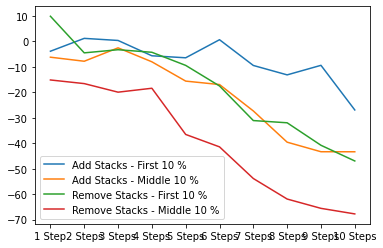

In [48]:
parallel_executions = pd.DataFrame(columns=["Option", "1 Step", "2 Steps", "3 Steps", "4 Steps", "5 Steps", "6 Steps", "7 Steps", "8 Steps", "9 Steps", "10 Steps"])
parallel_executions["Option"] = overall_runtime["Option"]
parallel_executions["1 Step"] = overall_runtime["Parallel (1)"]
parallel_executions["2 Steps"] = overall_runtime["Parallel (2)"]
parallel_executions["3 Steps"] = overall_runtime["Parallel (3)"]
parallel_executions["4 Steps"] = overall_runtime["Parallel (4)"]
parallel_executions["5 Steps"] = overall_runtime["Parallel (5)"]
parallel_executions["6 Steps"] = overall_runtime["Parallel (6)"]
parallel_executions["7 Steps"] = overall_runtime["Parallel (7)"]
parallel_executions["8 Steps"] = overall_runtime["Parallel (8)"]
parallel_executions["9 Steps"] = overall_runtime["Parallel (9)"]
parallel_executions["10 Steps"] = overall_runtime["Parallel (10)"]
display(parallel_executions)
plt.plot(parallel_executions.iloc[0, 1:], label="Add Stacks - First 10 %")
plt.plot(parallel_executions.iloc[1, 1:], label="Add Stacks - Middle 10 %")
plt.plot(parallel_executions.iloc[2, 1:], label="Remove Stacks - First 10 %")
plt.plot(parallel_executions.iloc[3, 1:], label="Remove Stacks - Middle 10 %")
plt.legend()
plt.savefig("exp3_parallel_linechart.png")
plt.show()
#parallel_executions.iloc[0, 1:].plot.line()

# statistical testing

In [55]:
 
display(raw_idle)
 
display(raw_parallel_1)
 
display(raw_parallel_10)
#for name, group in df_p.groupby(by=['variant', 'predicted_steps']):
            #mean_executiontime_row[f"Parallel ({name[1]})"] = round(group['pred_overall_execution_time'].median(), 3)
            #std_executiontime_row[f"Parallel ({name[1]})"] = round(group['pred_overall_execution_time'].std(), 3)#/mean_executiontime_row[f"Parallel ({name[1]})"]*100

#replan_large, seed_large = get_data("exp2/fixedPlanLength/max100itemsperstack")
#replan_small, seed_small = get_data("exp2/fixedPlanLength/max10itemsperstack")


,Disturbance,Setting,Value
0,ADD,FIRST,503.313975
1,ADD,FIRST,559.739009
2,ADD,FIRST,1438.32342
3,ADD,FIRST,527.883484
4,ADD,FIRST,753.229919
...,...,...,...
115,REMOVE,MIDDLE,708.899088
116,REMOVE,MIDDLE,708.695723
117,REMOVE,MIDDLE,646.184226
118,REMOVE,MIDDLE,650.174546


,Disturbance,Setting,Value
0,ADD,FIRST,503.313975
1,ADD,FIRST,559.739009
2,ADD,FIRST,1438.32342
3,ADD,FIRST,527.883484
4,ADD,FIRST,753.229919
...,...,...,...
115,REMOVE,MIDDLE,708.899088
116,REMOVE,MIDDLE,708.695723
117,REMOVE,MIDDLE,646.184226
118,REMOVE,MIDDLE,650.174546


,Disturbance,Setting,Value
0,ADD,FIRST,503.313975
1,ADD,FIRST,559.739009
2,ADD,FIRST,1438.32342
3,ADD,FIRST,527.883484
4,ADD,FIRST,753.229919
...,...,...,...
115,REMOVE,MIDDLE,708.899088
116,REMOVE,MIDDLE,708.695723
117,REMOVE,MIDDLE,646.184226
118,REMOVE,MIDDLE,650.174546


In [63]:
def test(replan, seed):
    p_values = pd.DataFrame(columns = ["Option", "p-value"])
    row = {}
    row['Option'] = "First 10 %"
    x = seed[seed.Setting == "FIRST"]['Value'].tolist()
    y = replan[replan.Setting == "FIRST"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="less")[1]
    p_values = p_values.append(row, ignore_index = True)
    row['Option'] = "Middle 10 %"
    x = seed[seed.Setting == "MIDDLE"]['Value'].tolist()
    y = replan[replan.Setting == "MIDDLE"]['Value'].tolist()
    row['p-value'] = st.mannwhitneyu(x, y, alternative="less")[1]
    p_values = p_values.append(row, ignore_index = True)
    return p_values
print("Large Model - Add Stack Case")
raw_idle_add = raw_idle[raw_idle.Disturbance=='ADD']
raw_parallel_1_add = raw_parallel_1[raw_parallel_1.Disturbance=='ADD']
display(test(raw_idle_add, raw_parallel_1_add))
print("Large Model - Delete Stack Case")
raw_idle_add = raw_idle[raw_idle.Disturbance=='REMOVE']
raw_parallel_1_add = raw_parallel_1[raw_parallel_1.Disturbance=='REMOVE']
display(test(raw_idle_add, raw_parallel_1_add))
print("Small Model - Add Stack Case")
raw_idle_add = raw_idle[raw_idle.Disturbance=='ADD']
raw_parallel_1_add = raw_parallel_1[raw_parallel_1.Disturbance=='ADD']
display(test(raw_idle_add, raw_parallel_1_add))
print("Small Model - Delete Stack Case")
raw_idle_add = raw_idle[raw_idle.Disturbance=='REMOVE']
raw_parallel_1_add = raw_parallel_1[raw_parallel_1.Disturbance=='REMOVE']
display(test(raw_idle_add, raw_parallel_1_add))

Large Model - Add Stack Case


,Option,p-value
0,First 10 %,0.50295
1,Middle 10 %,0.50295


Large Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.50295
1,Middle 10 %,0.50295


Small Model - Add Stack Case


,Option,p-value
0,First 10 %,0.50295
1,Middle 10 %,0.50295


Small Model - Delete Stack Case


,Option,p-value
0,First 10 %,0.50295
1,Middle 10 %,0.50295
